# intro to HTS data
In this exercise will cover the following:

 - File formats (FASTQ, SAM/BAM, VCF)
 - Mapping (single-end, paired-end) NGS data to a reference sequence
 - Read flags
 - VERY IMPORTANT, you need to identify the 'pipe' button on your computer '|'. That is the character that looks like a vertical bar, on a standard American keyboard this can be found by pressing shift+'button left of enter' or 'button above enter

## Environment setup

Must be run for the other parts of the excercises to work

In [1]:
COURSE_PATH=/course/popgen25
DATA_PATH=$COURSE_PATH/NGSIntro 
SOFTWARE_PATH=$COURSE_PATH/software

# JAVA program
PICARD=${SOFTWARE_PATH}/picard.jar

echo --programs that are installed:--
which samtools
which bwa
which angsd
which bcftools
ls $PICARD

#make folder 
mkdir -p ~/popgen25_ngsintro

# enter folder
cd ~/popgen25_ngsintro

#make sym link for data and current folder
ln -sfn ~/popgen25_ngsintro ~/current_folder
ln -sfn $DATA_PATH ~/data_folder

--programs that are installed:--
/usr/bin/samtools
/usr/bin/bwa
/usr/local/bin/angsd
/usr/bin/bcftools
/course/popgen25/software/picard.jar



Lets copy some key file to your directory. We will use symbolic links to the reference genomes and the fastQ files

In [2]:

#make links to files and add them to the folder
cp -sf  $DATA_PATH/fastq/NA19238.YRI.low_coverage.chr21_1.fq.gz .
cp -sf  $DATA_PATH/fastq/NA19238.YRI.low_coverage.chr21_2.fq.gz .
cp -sf  $DATA_PATH/human/chr21.fa.gz .


echo --Datasets that will be use--
echo -pair of fastQ files:
ls *chr21_*.fq.gz

echo -reference genome that we will use:
ls chr21.fa.gz


--Datasets that will be use--
-pair of fastQ files:
NA19238.YRI.low_coverage.chr21_1.fq.gz  NA19238.YRI.low_coverage.chr21_2.fq.gz
-reference genome that we will use:
chr21.fa.gz



## Mapping one reduced genome
In this exercise you will align a fastq file using bwa and generate a SAM file.

Due to the computational time we have created a reduced genome from one of the individuals from the 1000genomes pilot project. The individual, NA19238, has been sequenced using llumina. For this excerice we have created a reduced reference genome consisting only of chromosome 21 (the smallest human chromosome) and also reduced the sequencing data to reads that will likely map to chromosome 21 with the first 15Mb of the chromosome.  

 The fastQ file NA19238.YRI.low_coverage.chr21_1.fq.gz has variable name with *_1.fq.gz  which is first read or the read pair 
 
 We first want map both read pairs to the reference genome chr21.fa.gz.
 
 
 
### Viewing the input files

view the fastq file (NA19238......1.fq.gz) using the head command and identity the reads and quality scores (ignore the length)


In [3]:
# -n defermines the number of lines printed
gunzip -c NA19238.YRI.low_coverage.chr21_2.fq.gz | head -n 20


@SRR794309.186
GTTGGCGTGGGTGCAGTGATGAGGGAACACTTCTACACTGCTGGTGGGATTGTAAGCTAGTATAGCCACCACAGAAAACAGTGTGGAGATTTCTTAAAGA
+
CCCFFFFDHHHFHIIJEHIJJHIJJIJIJJJJJJJJJJJJJJJJFHIJGJHIGIJJJJHHEEEHHFFFFFDDDEDDDDDDDCCACDDDDDDDDEDDEDDD
@SRR794309.852
ATTTACCATTACTTTGTGGGATTGCTTTTGGTTTATTGTCCTGTTATTCTGATACTGAATTGATATTTTGCATGACAAGCCTTATTAATTTGCCAGAATT
+
CCCFFFFFHHHHHJJJGIJJIJJJJJJJJIJHIJIJJBIIJJJHIJJJJJIJJJJJJJJJJJIIJJJJJIJJJJJJJJJHHHHHFFFFFFFEEEEEEDDD
@SRR794309.869
GCTTTGTGATGTGTGCATTCATCTCACAGGGTTGAACCTAGGTTATGATTGAGCAGTTTTGAAACACTCTTTTTGTAGGATCTTCAAGTGGATATTTGGA
+
CCCFFFDFGHHHHHIJJJJJJJJJIIJJJJJIHJIJJJJJJJDGIJJIJJIJJJJIFHIJIIJJIJIIJJJJJJHHHHHFFFFFFFEECEEDDEDEFEDD
@SRR794309.2365
ATGGAACAACCCGAATGGAATGGAATGTAGTGGAGAGTAAGGGAGTTGAATAGAATCAATCCGAATGTAATGGAATGGAATGCAACGGAATGGGATGGAA
+
@<@BDAA<DF?CFB@FCEC<BACBBFH9??1?D*?3?0:BFEH9?0?8CC<==B@@4=;47;;?ACE3?;?@;3;>C;(6;;@ACC@B?BBC@(9:8??A
@SRR794309.2601
TTATATGCTTTCATTGTTGCTTTGGACTAAAAGTAAAACCCCATCTATGAGCCACACTGTTCACTAATCCAAGAAAATACATGTCACTGTGATTTTAGGA
+
@C@D

 - identify the read names, the sequence, the base quality scores. Fill in the ???? below
<code>
?????        @SRR794309.186 
?????        GTTGGCGTGGGTGCAGTGATGAGGGAACACTTCTACACTGCTGGTGGGATTGTAAGCTAGTATAGCCACCACAGAAAACAGTGTGGAGATTTCTTAAAGA
        +
?????        CCCFFFFDHHHFHIIJEHIJJHIJJIJIJJJJJJJJJJJJJJJJFHIJGJHIGIJJJJHHEEEHHFFFFFDDDEDDDDDDDCCACDDDDDDDDEDDEDDD
</code>
View the reference fasta file (chr21.fa.gz) using the head command.

The below command count the number of lines in the file
 - How many lines to you have ????
 - How many Reads in the data ????
 - is the number of lines the same in the 2 fastQ files ???? ( modify the code below to see the number of lines in the other file)

In [4]:
gunzip -c NA19238.YRI.low_coverage.chr21_2.fq.gz |  wc -l

687520



View the reference fasta file (chr21.fa.gz) using the head command. The first many bases of the refence genome is all Ns ( unknown bases).
First view the first bases of chr21 then then try to view other parts. You can modify the below uncommented code below



In [5]:
# first 20 lines
gunzip -c chr21.fa.gz | head -n 20

# last 100 lines of the first million  lines (uncomment and modify below)
# gunzip -c chr21.fa.gz | head -n 1000000 | tail -n 100

>chr21
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN

gzip: stdout: Broken pi


## Aligning

Align the reads using bwa. We use bwa in the exercises because it is fast and widely used. We first need to index the reference chromosome, followed by the actual aligning process. If should take around 1 min to finish. 


In [6]:
## # we will use the prepared index files
bwa index chr21.fa.gz

[bwa_index] Pack FASTA... 0.64 sec
[bwa_index] Construct BWT for the packed sequence...
[BWTIncCreate] textLength=93888646, availableWord=18606164
[BWTIncConstructFromPacked] 10 iterations done. 30691126 characters processed.
[BWTIncConstructFromPacked] 20 iterations done. 56697766 characters processed.
[BWTIncConstructFromPacked] 30 iterations done. 79808534 characters processed.
[bwt_gen] Finished constructing BWT in 37 iterations.
[bwa_index] 31.94 seconds elapse.
[bwa_index] Update BWT... 0.27 sec
[bwa_index] Pack forward-only FASTA... 0.51 sec
[bwa_index] Construct SA from BWT and Occ... 7.00 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index chr21.fa.gz
[main] Real time: 40.385 sec; CPU: 40.368 sec



Once the index is made, the second step is to map the reads. There are several ways to do this, but I suggest you use the bwa mem mode, which is the most commonly used these days. Again you can run it with no arguments to get info about how to use it. 

In [7]:
# see options
bwa mem


Usage: bwa mem [options] <idxbase> <in1.fq> [in2.fq]

Algorithm options:

       -t INT        number of threads [1]
       -k INT        minimum seed length [19]
       -w INT        band width for banded alignment [100]
       -d INT        off-diagonal X-dropoff [100]
       -r FLOAT      look for internal seeds inside a seed longer than {-k} * FLOAT [1.5]
       -y INT        seed occurrence for the 3rd round seeding [20]
       -c INT        skip seeds with more than INT occurrences [500]
       -D FLOAT      drop chains shorter than FLOAT fraction of the longest overlapping chain [0.50]
       -W INT        discard a chain if seeded bases shorter than INT [0]
       -m INT        perform at most INT rounds of mate rescues for each read [50]
       -S            skip mate rescue
       -P            skip pairing; mate rescue performed unless -S also in use

Scoring options:

       -A INT        score for a sequence match, which scales options -TdBOELU unless overridden [1]
     

The number of options may be a bit overwhelming, but you can run it with no additional options, although I suggest you add "-t 5" to run 5 threads if your computer has multiple cores. It reads the compressed fastq files directly, so you need not decompress them. By default the result comes on stdout (in the terminal), so you have to redirect to a file, like the below command. 
We also want to add a read group name with information about where the reads comes from. This is very usefull if you have sequencing data from multiple libraries.  
Now try to align the data


In [8]:
#align the data ( take ~ 1 min)
bwa mem -R '@RG\tID:foo\tSM:bar\tLB:library1' -t 5 chr21.fa.gz NA19238.YRI.low_coverage.chr21_1.fq.gz NA19238.YRI.low_coverage.chr21_2.fq.gz  > NA19238.sam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 343760 sequences (34376000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (12, 93011, 73, 12)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (548, 1375, 6799)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 19301)
[M::mem_pestat] mean and std.dev: (2500.67, 3111.22)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 25552)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (134, 170, 222)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 398)
[M::mem_pestat] mean and std.dev: (181.60, 65.41)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 486)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (559, 1777, 4330)
[M::mem_pestat] low a

Lets look at the generated sam file

In [9]:
# view first 100 lines
head -n100 NA19238.sam

@SQ	SN:chr21	LN:46944323
@RG	ID:foo	SM:bar	LB:library1
@PG	ID:bwa	PN:bwa	VN:0.7.17-r1188	CL:bwa mem -R @RG\tID:foo\tSM:bar\tLB:library1 -t 5 chr21.fa.gz NA19238.YRI.low_coverage.chr21_1.fq.gz NA19238.YRI.low_coverage.chr21_2.fq.gz
SRR794309.186	99	chr21	16239093	60	100M	=	16239300	307	CCTTTTTATGGCTGAGTAGTATTCCACAGTTTCTTTACCCACTCCTTGATCAATAGGCACTTGGGTTGGTTCCACGATTTTGCATTTGTGAATTGTGTTG	CCCFFFFFHHHHHJJJFHIFHHJIJJJJJHIJJJJJIIJJJJJJJJJIHIIJJJJJJJJJJJJJJFHIJHFHHHHFFFDDEEEEEEDEACCEEECDCCDD	NM:i:0	MD:Z:100	MC:Z:100M	AS:i:100	XS:i:26	RG:Z:foo
SRR794309.186	147	chr21	16239300	60	100M	=	16239093	-307	TCTTTAAGAAATCTCCACACTGTTTTCTGTGGTGGCTATACTAGCTTACAATCCCACCAGCAGTGTAGAAGTGTTCCCTCATCACTGCACCCACGCCAAC	DDDEDDEDDDDDDDDCACCDDDDDDDEDDDFFFFFHHEEEHHJJJJIGIHJGJIHFJJJJJJJJJJJJJJJJIJIJJIHJJIHEJIIHFHHHDFFFFCCC	NM:i:0	MD:Z:100	MC:Z:100M	AS:i:100	XS:i:39	RG:Z:foo
SRR794309.852	83	chr21	18423539	60	100M	=	18423474	-165	TTTTGCATGACAAGCCTTATTAATTTGCCAGAATTATTCCTCCTGGCAACATCTATTCAGAATGCATTGTAGAAGCAGGTAGAGGGTTAGTGG

You can read about the sam output here: https://bioinformatics-core-shared-training.github.io/cruk-summer-school-2017/Day1/Session5-alignedReads.html  

 - Identify the header and explain its contents. 
 - For the first read identify the following and fill in the (?????) below
     - the chromosome
     - the position of the first base of the read 
     - The mapping qualty
     - The alignment (cigar string)
     - the insert size (template length)
     - the read(the bases)
     - the base qualities
 <code>
 SRR794309.186	(the name of the read)
 99 			(FLAGS)
 chr21			(?????)
 16239093		(?????
 60				(?????
 100M			(?????
 =				(name of the mate is the same)
 16239300		(position of the mate)
 307			(?????)
 CCTTTTTATGGCTGAGTAGTATTCCACAGTTTCTTTACCCACTCCTTGATCAATAGGCACTTGGGTTGGTTCCACGATTTTGCATTTGTGAATTGTGTTG		(?????)
 CCCFFFFFHHHHHJJJFHIFHHJIJJJJJHIJJJJJIIJJJJJJJJJIHIIJJJJJJJJJJJJJJFHIJHFHHHHFFFDDEEEEEEDEACCEEECDCCDD		(?????)
 NM:i:0	MD:Z:100	MC:Z:100M	AS:i:100	XS:i:26	RG:Z:foo  (TAGS)
 </code>
 
 
 To understand the flags (second column in the sam format) you can type a flag into this page and get the meaning: https://broadinstitute.github.io/picard/explain-flags.html
 


Lets try to find the number of reads  in the samfile.


In [10]:
wc -l NA19238.sam 

345794 NA19238.sam



Why is it not the same number as in the fastQ file?



Fortunately there are tools to handle sam files, which will make your life easier. We will use the samtools program. First, you often need the compressed version of the sam format, which is called bam. You use samtools view for converting between formats. BAM files faciliates random access to genomic regions, but this requires the file to be sorted and requires  an index this is generated using the command below.
Converting sam to bam is done like this:

In [11]:
#sam to bam
samtools view -b NA19238.sam > NA19238.bam
#sort bam file
samtools sort -o NA19238.sorted.bam NA19238.bam
#index bam file
samtools index NA19238.sorted.bam

#see sizes
echo --- files sizes ---
ls -lah NA19238.sam NA19238.bam NA19238.sorted.bam

--- files sizes ---
-rw-r--r-- 1 jupyter-god jupyter-god  35M Aug  3 18:50 NA19238.bam
-rw-r--r-- 1 jupyter-god jupyter-god 105M Aug  3 18:50 NA19238.sam
-rw-r--r-- 1 jupyter-god jupyter-god  30M Aug  3 18:50 NA19238.sorted.bam



The bam file is a compressed version of sam, you can see it is about one-third of the sam file in size. 



We now have a functional alignment file that we can use for analysis. Lets first to view the alignment at different part of the chromosome 21. We will use tview to extact alignment. The option -d -w print  120 bases of the alignment to the terminal. If the alignment looks wierd then try to lower this number

In [12]:
samtools tview NA19238.sorted.bam  -d T -w 120 -p chr21:10002000

 10002001  10002011  10002021  10002031  10002041  10002051  10002061  10002071  10002081  10002091  10002101           
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
TTTAAAATAAGATTATTCAATTATATGCTAATAAATGTGAAAACTTAGATGGAATGGAAAAATTCCTAGACGGATATAAAACACTAACATTAGTRCAAGAAAATATATTTATATAGAAAT
tttaaaataagattattcaattat      ataaatgtgaaaacttagatggaatggaaaaattcctagacggatataaaacactaacattagtgcaagaaaatatatttatatagaaat
TTTAAAATAAGATTATTCAATTATATGCTAATAAATGTGAAAACTTAGATGGAATGGAAAA                             tagtacaagaaaatatatttatatagaaat
TTTAAAATAAGATTATTCAATTATATGCTAATAAATGTGAAAACTTAGATGGAATGGAAAAATTCCTAGACGGA                           aatatatttatatagaaat
TTTAAAATAAGATTATTCAATTATATGCTAATAAATGTGAAAACTTAGATGGAATGGAAAAATTCCTAGACGGATATAAAAC                                      
                   attatatgctaataaatgtgaaaacttagatggaatggaaaaattcctagacggatataaaacactaacattagtacaagaaaatatatttatatagaaa 
                                

In the above the lines are

Line1: The position on chromome 21

Line2: The refence genome ( N if not provided)

Line3: The concensus sequence (If all reads have a G then the concensus is G)

Line4+:  (lines 4,5 ect) the reads alignment


- When looking at the region starting with position chr21:10002000 can you find a possible variable site?
- look at chr21:10028350. Do you think there are problems with the alignment at this position?
- look at chr21:10042151. is this a variable site or is there another likely explanation?

Lets try to add the referecne genome to make it esiaer to see the sequencing error and variable sites

In [13]:
samtools tview NA19238.sorted.bam  -d T -w 120 -p chr21:10042151 chr21.fa.gz

10042151  10042161  10042171  10042181  10042191  10042201  10042211  10042221  10042231  10042241  10042251  10042261  
AGGTTCCCCAGAAAGCCTCTATCCTGAAATGCTTGAAAGTGAGCAGTGCTGACTCTCGATTATTACCAATTGCATTAAATATGACACTTGTTTTGTTTCTTTTGGCTATAAGGAGAAAAT
.S....................M.................................................................................................
..,,,,,,,,,,,,,,,,,,,,a,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,t,,,,,,,,,,,,..................
........................................................................................................................
,c,,,,,,,,,,,,,,,,,,,,a,,,,,,,,,,,, ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
......................................                    ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
........................................                                  ..............................................
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

 - How many likelely variable sites can you see?
 - Is is possible that both of the first two sites (sites 10042151 and 10042152) are heterzygoes sites?
 - Have a look at the region staring with 9719896. Do you think the variable sites in this region are reliable (why/why not)?
 
 
 Another way to look at the genome is by generating a [pileup](http://samtools.sourceforge.net/samtools.shtml) format

In [14]:
# see first 1000 sites where there is data
samtools mpileup NA19238.sorted.bam  | head -n 1000

[mpileup] 1 samples in 1 input files
chr21	2627371	N	1	^!c	j
chr21	2627372	N	1	g	j
chr21	2627373	N	1	g	i
chr21	2627374	N	1	t	c
chr21	2627375	N	1	t	\
chr21	2627376	N	1	c	i
chr21	2627377	N	1	c	l
chr21	2627378	N	1	c	k
chr21	2627379	N	1	t	f
chr21	2627380	N	1	c	k
chr21	2627381	N	1	c	g
chr21	2627382	N	1	a	`
chr21	2627383	N	1	c	j
chr21	2627384	N	1	t	j
chr21	2627385	N	1	g	h
chr21	2627386	N	1	g	j
chr21	2627387	N	1	c	j
chr21	2627388	N	1	c	j
chr21	2627389	N	1	a	j
chr21	2627390	N	1	c$	i
chr21	9719768	N	3	^]A^IA^]A	I2J
chr21	9719769	N	3	AA^]a	JJf
chr21	9719770	N	3	TTt	JJ`
chr21	9719771	N	3	TTt	IJ`
chr21	9719772	N	3	CCc	JIm
chr21	9719773	N	3	TTt	JJp
chr21	9719774	N	3	GGg	JJp
chr21	9719775	N	3	AAa	JJi
chr21	9719776	N	3	GGg	JJm
chr21	9719777	N	4	AAa^]A	JJnC
chr21	9719778	N	4	AAaA	JJnC
chr21	9719779	N	4	AAaA	JJcC
chr21	9719780	N	4	CCcC	JJlF
chr21	9719781	N	4	TTtT	GJ`F
chr21	9719782	N	4	TTtT	IJ_F
chr21	9719783	N	4	CCcC	JJhF
chr21	9719784	N	4	TTtT	GJfF
chr21	9719785	N	4	TTtT	IJbH
chr21	9719786	N	4	TTtT	J


Each line is a position with data.
 - When is this a format particually usefull?
 
 
 From the pileup it is easiy to get the sequencing depth distribution

In [15]:
samtools mpileup NA19238.sorted.bam | cut -f4 | sort -n | uniq -c >dep2
cat dep2

[mpileup] 1 samples in 1 input files
  25826 0
1695929 1
1490893 2
 983228 3
 533475 4
 258310 5
 131990 6
  74779 7
  50544 8
  37815 9
  31619 10
  27191 11
  25101 12
  22209 13
  19728 14
  17738 15
  16968 16
  14934 17
  13218 18
  11701 19
   9897 20
   8617 21
   7406 22
   6300 23
   5548 24
   4934 25
   4124 26
   3535 27
   3296 28
   2812 29
   2353 30
   2362 31
   2248 32
   1986 33
   1737 34
   1659 35
   1539 36
   1272 37
   1136 38
   1049 39
    940 40
    818 41
    651 42
    621 43
    566 44
    521 45
    425 46
    452 47
    395 48
    393 49
    362 50
    341 51
    384 52
    311 53
    311 54
    297 55
    261 56
    184 57
    183 58
    167 59
    155 60
    162 61
    124 62
     87 63
    122 64
    106 65
    153 66
     84 67
     72 68
    104 69
     91 70
     62 71
     84 72
     85 73
     90 74
     71 75
     77 76
    120 77
     92 78
    106 79
     84 80
    102 81
    101 82
     80 83
     91 84
    102 85
     88 86
     59 87
     


the left column is the number of sites and the right is the depth. 

View the distribution for this individuals using the following R command


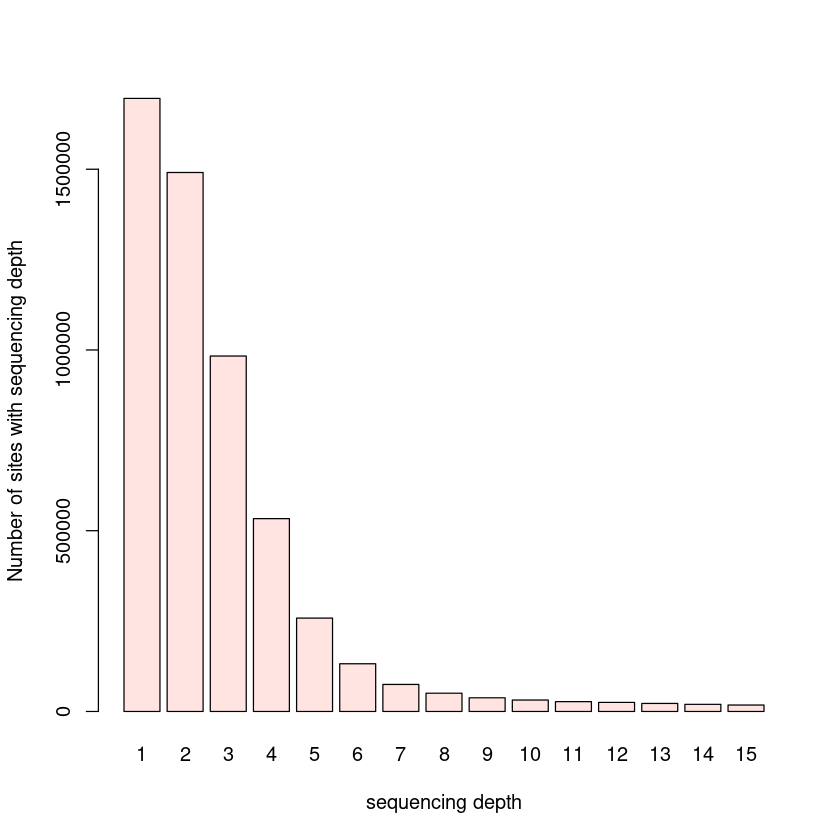

In [16]:
depth <- read.table("~/current_folder/dep2")
d <- 1:15 #chosen depths to plot

barplot(depth[d+1,1],names=d,xlab="sequencing depth",ylab="Number of sites with sequencing depth ",col="mistyrose")


 - How do you think the depth will affect genotype and variant calling?
 
 First lets view the mpileup with the reference

In [17]:
samtools mpileup -f chr21.fa.gz NA19238.sorted.bam | head -n 1000

[mpileup] 1 samples in 1 input files
chr21	2627371	N	0	*	*
chr21	2627372	N	0	*	*
chr21	2627373	N	0	*	*
chr21	2627374	N	0	*	*
chr21	2627375	N	0	*	*
chr21	2627376	N	0	*	*
chr21	2627377	N	0	*	*
chr21	2627378	N	0	*	*
chr21	2627379	N	0	*	*
chr21	2627380	N	0	*	*
chr21	2627381	N	0	*	*
chr21	2627382	N	0	*	*
chr21	2627383	N	0	*	*
chr21	2627384	N	0	*	*
chr21	2627385	N	0	*	*
chr21	2627386	N	0	*	*
chr21	2627387	N	0	*	*
chr21	2627388	N	0	*	*
chr21	2627389	N	0	*	*
chr21	2627390	N	0	*	*
chr21	9719768	A	3	^].^I.^].	<2<
chr21	9719769	a	3	..^],	??P
chr21	9719770	t	3	..,	JJ`
chr21	9719771	t	3	..,	IJ`
chr21	9719772	c	3	..,	JIm
chr21	9719773	t	3	..,	JJp
chr21	9719774	g	3	..,	JJp
chr21	9719775	a	3	..,	JJi
chr21	9719776	g	3	..,	JJm
chr21	9719777	a	4	..,^].	JJnA
chr21	9719778	a	4	..,.	JJnB
chr21	9719779	a	4	..,.	JJcC
chr21	9719780	c	4	..,.	JJlF
chr21	9719781	t	4	..,.	GJ`F
chr21	9719782	t	4	..,.	IJ_F
chr21	9719783	c	4	..,.	JJhF
chr21	9719784	t	4	..,.	GJfF
chr21	9719785	t	4	..,.	IJbH
chr21	9719786	t	4	..,.	JIjH

 - Can you see the difference compared to not using the referecne genome. 
 - Can you identify a heterozygoes site? (e.g. position 9719896)
 
 
 ### Variant calling 
  Lets create a VCF file for the first couple of MB of chr21. This is done based on the mpileup. There will be much more information tomorrow about how the calling is done using genotype likelihoods. However, before doing so we should remove duplicated reads ( read with the same starting points) as they are likely PCR duplicate

In [18]:
## remove duplicates
samtools rmdup -s NA19238.sorted.bam NA19238.md.bam

## call variants
bcftools mpileup -Ou -f chr21.fa.gz NA19238.md.bam | bcftools call -mv -Ov -o NA19238.vcf

Note: none of --samples-file, --ploidy or --ploidy-file given, assuming all sites are diploid
[mpileup] 1 samples in 1 input files
[mpileup] maximum number of reads per input file set to -d 250



Lets have a look at the VCF file

In [19]:
head -n 200 NA19238.vcf 

##fileformat=VCFv4.2
##FILTER=<ID=PASS,Description="All filters passed">
##bcftoolsVersion=1.13+htslib-1.13+ds
##bcftoolsCommand=mpileup -Ou -f chr21.fa.gz NA19238.md.bam
##reference=file://chr21.fa.gz
##contig=<ID=chr21,length=46944323>
##ALT=<ID=*,Description="Represents allele(s) other than observed.">
##INFO=<ID=INDEL,Number=0,Type=Flag,Description="Indicates that the variant is an INDEL.">
##INFO=<ID=IDV,Number=1,Type=Integer,Description="Maximum number of raw reads supporting an indel">
##INFO=<ID=IMF,Number=1,Type=Float,Description="Maximum fraction of raw reads supporting an indel">
##INFO=<ID=DP,Number=1,Type=Integer,Description="Raw read depth">
##INFO=<ID=VDB,Number=1,Type=Float,Description="Variant Distance Bias for filtering splice-site artefacts in RNA-seq data (bigger is better)",Version="3">
##INFO=<ID=RPBZ,Number=1,Type=Float,Description="Mann-Whitney U-z test of Read Position Bias (closer to 0 is better)">
##INFO=<ID=MQBZ,Number=1,Type=Float,Description="Mann-Whitney 


 The header of the VCF contains meta information about what it in the file.
In the body of the file
 - Identify the position, the reference allele and the alternative allele of the file.
 - Identify the depth of each position
 - Find a tri-allelic site. Do you believe that it is truely triallelic?
 - How many sites are are called as variable?
 
 
 
 # Bonus exercise (Only do this part if you have finished the rest) 
 ## Bonus exercise 1 -  duplicated reads using Picardtools
 
 bwa actually fills in the mate information, but not all aligners do that, so we can run picard tools to fill in the mate information and sort the file according to position. We will output the file in the binary version of SAM which is BAM

In [20]:

java -jar $PICARD FixMateInformation INPUT=NA19238.sam \
OUTPUT=id.fixmate.srt.bam SORT_ORDER=coordinate

INFO	2025-08-03 18:51:42	FixMateInformation	

********** NOTE: Picard's command line syntax is changing.
**********
********** For more information, please see:
********** https://github.com/broadinstitute/picard/wiki/Command-Line-Syntax-Transition-For-Users-(Pre-Transition)
**********
********** The command line looks like this in the new syntax:
**********
**********    FixMateInformation -INPUT NA19238.sam -OUTPUT id.fixmate.srt.bam -SORT_ORDER coordinate
**********


18:51:42.924 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/davidData/data/course/popgen25/software/picard.jar!/com/intel/gkl/native/libgkl_compression.so
[Sun Aug 03 18:51:42 CEST 2025] FixMateInformation INPUT=[NA19238.sam] OUTPUT=id.fixmate.srt.bam SORT_ORDER=coordinate    ASSUME_SORTED=false ADD_MATE_CIGAR=true IGNORE_MISSING_MATES=true VERBOSITY=INFO QUIET=false VALIDATION_STRINGENCY=STRICT COMPRESSION_LEVEL=5 MAX_RECORDS_IN_RAM=500000 CREATE_INDEX=false CREATE_MD5_FILE=false GA4GH_CLIENT

View the header of the BAM file

In [21]:
samtools view -H id.fixmate.srt.bam 

@HD	VN:1.6	SO:coordinate
@SQ	SN:chr21	LN:46944323
@RG	ID:foo	SM:bar	LB:library1
@PG	ID:bwa	PN:bwa	VN:0.7.17-r1188	CL:bwa mem -R @RG\tID:foo\tSM:bar\tLB:library1 -t 5 chr21.fa.gz NA19238.YRI.low_coverage.chr21_1.fq.gz NA19238.YRI.low_coverage.chr21_2.fq.gz
@PG	ID:samtools	PN:samtools	PP:bwa	VN:1.13	CL:samtools view -H id.fixmate.srt.bam



picard didn't update the PG flag, so let us update the header information so that we have documented how we modified the file.

In [22]:

(samtools view -H id.fixmate.srt.bam;echo -e "@PG\tID:fixmate\tPN:fixmate\tVN:2.60\tCL:stuff" ) >newhd
samtools reheader newhd id.fixmate.srt.bam > id.fixmate.srt2.bam


 - Validate that the header in file id.fixmate.srt2.bam  has been updated

In [23]:
samtools view -H id.fixmate.srt2.bam 

@HD	VN:1.6	SO:coordinate
@SQ	SN:chr21	LN:46944323
@RG	ID:foo	SM:bar	LB:library1
@PG	ID:bwa	PN:bwa	VN:0.7.17-r1188	CL:bwa mem -R @RG\tID:foo\tSM:bar\tLB:library1 -t 5 chr21.fa.gz NA19238.YRI.low_coverage.chr21_1.fq.gz NA19238.YRI.low_coverage.chr21_2.fq.gz
@PG	ID:samtools	PN:samtools	PP:bwa	VN:1.13	CL:samtools view -H id.fixmate.srt.bam
@PG	ID:fixmate	PN:fixmate	VN:2.60	CL:stuff
@PG	ID:samtools.1	PN:samtools	PP:samtools	VN:1.13	CL:samtools reheader newhd id.fixmate.srt.bam
@PG	ID:samtools.2	PN:samtools	PP:samtools.1	VN:1.13	CL:samtools view -H id.fixmate.srt2.bam



Now mark duplicates using picard

In [24]:

java -jar $PICARD MarkDuplicates I=id.fixmate.srt2.bam \
O=id.fixmate.srt.md.bam  M=metrics;


INFO	2025-08-03 18:51:50	MarkDuplicates	

********** NOTE: Picard's command line syntax is changing.
**********
********** For more information, please see:
********** https://github.com/broadinstitute/picard/wiki/Command-Line-Syntax-Transition-For-Users-(Pre-Transition)
**********
********** The command line looks like this in the new syntax:
**********
**********    MarkDuplicates -I id.fixmate.srt2.bam -O id.fixmate.srt.md.bam -M metrics
**********


18:51:51.044 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/davidData/data/course/popgen25/software/picard.jar!/com/intel/gkl/native/libgkl_compression.so
[Sun Aug 03 18:51:51 CEST 2025] MarkDuplicates INPUT=[id.fixmate.srt2.bam] OUTPUT=id.fixmate.srt.md.bam METRICS_FILE=metrics    MAX_SEQUENCES_FOR_DISK_READ_ENDS_MAP=50000 MAX_FILE_HANDLES_FOR_READ_ENDS_MAP=8000 SORTING_COLLECTION_SIZE_RATIO=0.25 TAG_DUPLICATE_SET_MEMBERS=false REMOVE_SEQUENCING_DUPLICATES=false TAGGING_POLICY=DontTag CLEAR_DT=true DUPLEX_UMI=

 - Did picard update the PG flag of the header?
 - Did picard update anything else in the header?

NB you can view the header of a bamfile using 'samtools view -H'




In [25]:
samtools view -H id.fixmate.srt.md.bam

@HD	VN:1.6	SO:coordinate
@SQ	SN:chr21	LN:46944323
@RG	ID:foo	SM:bar	LB:library1
@PG	ID:bwa	PN:bwa	VN:0.7.17-r1188	CL:bwa mem -R @RG\tID:foo\tSM:bar\tLB:library1 -t 5 chr21.fa.gz NA19238.YRI.low_coverage.chr21_1.fq.gz NA19238.YRI.low_coverage.chr21_2.fq.gz
@PG	ID:samtools	PN:samtools	PP:bwa	VN:1.13	CL:samtools view -H id.fixmate.srt.bam
@PG	ID:fixmate	PN:fixmate	VN:2.60	CL:stuff
@PG	ID:samtools.1	PN:samtools	PP:samtools	VN:1.13	CL:samtools reheader newhd id.fixmate.srt.bam
@PG	ID:MarkDuplicates	VN:2.19.0-SNAPSHOT	CL:MarkDuplicates INPUT=[id.fixmate.srt2.bam] OUTPUT=id.fixmate.srt.md.bam METRICS_FILE=metrics    MAX_SEQUENCES_FOR_DISK_READ_ENDS_MAP=50000 MAX_FILE_HANDLES_FOR_READ_ENDS_MAP=8000 SORTING_COLLECTION_SIZE_RATIO=0.25 TAG_DUPLICATE_SET_MEMBERS=false REMOVE_SEQUENCING_DUPLICATES=false TAGGING_POLICY=DontTag CLEAR_DT=true DUPLEX_UMI=false ADD_PG_TAG_TO_READS=true REMOVE_DUPLICATES=false ASSUME_SORTED=false DUPLICATE_SCORING_STRATEGY=SUM_OF_BASE_QUALITIES PROGRAM_RECORD_ID=MarkDupl



## Bonus exercise 2 - clean you bam files using the FLAGS column

The second column in the SAM format is the very important FLAG. This will tell tell you about the state of the paired end mapping, QC duplicates etc.


  
Using the samtools -F/-f you can discard/include flags that fulfill certain patterns. See http://broadinstitute.github.io/picard/explain-flags.html .

  1. How many reads have we marked as duplicate in the final file.
  2. How many properly mapped read pairs do we have? (Where both reads map to the same chr etc).
  3. How many mapped reads do we have ?
  4. How many unmapped reads do we have ?
  5. Find the distribution of the RNAMES of the unmapped reads!?

 Run the following command one at a time by uncommenting them

In [26]:



#samtools view -f 1024 id.fixmate.srt.md.bam|wc -l
#samtools view -f 2 id.fixmate.srt.md.bam|wc -l
#samtools view -F 4 id.fixmate.srt.md.bam|wc -l
#samtools view -f 4 id.fixmate.srt.md.bam|wc -l
# samtools view -f 4 id.fixmate.srt.md.bam|cut -f3|sort -n |uniq -c




Compare with "samtools flagstat" command 


In [27]:
samtools flagstat id.fixmate.srt.md.bam


345791 + 0 in total (QC-passed reads + QC-failed reads)
343760 + 0 primary
0 + 0 secondary
2031 + 0 supplementary
5777 + 0 duplicates
5777 + 0 primary duplicates
280770 + 0 mapped (81.20% : N/A)
278739 + 0 primary mapped (81.09% : N/A)
343760 + 0 paired in sequencing
171880 + 0 read1
171880 + 0 read2
269744 + 0 properly paired (78.47% : N/A)
275806 + 0 with itself and mate mapped
2933 + 0 singletons (0.85% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)



Make a new bamfile, where you only the reads where both ends maps, and filter out those with a mapping quality below 10, and removing duplicates


In [28]:
samtools view -f 2 -F 1024 id.fixmate.srt.md.bam -q 10 >new.bam